### Что такое машинное обучение и зачем оно нужно?

###  Искусственный Интеллект VS Машинное Обучение VS Нейросети

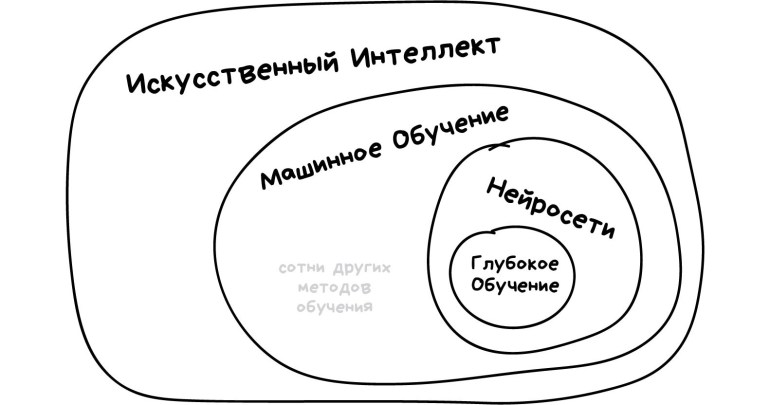

### Карта мира машинного обучения

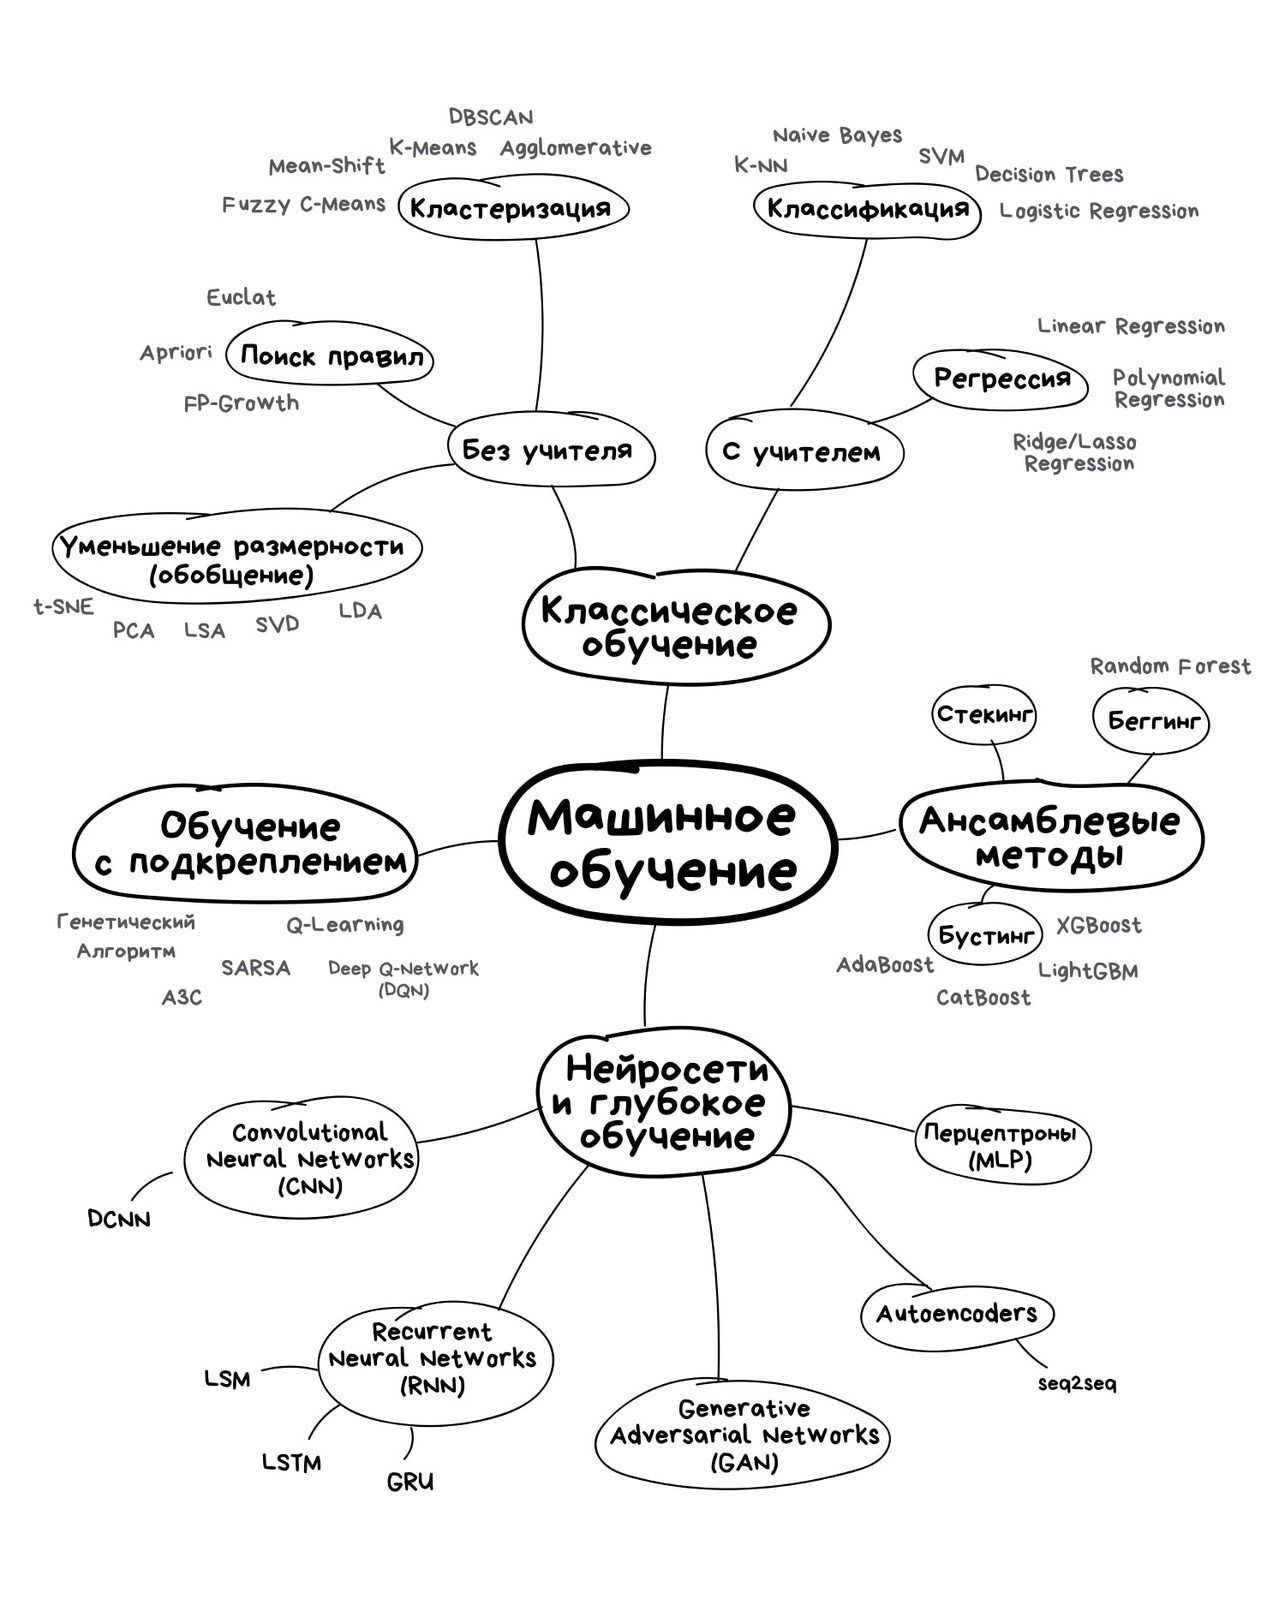

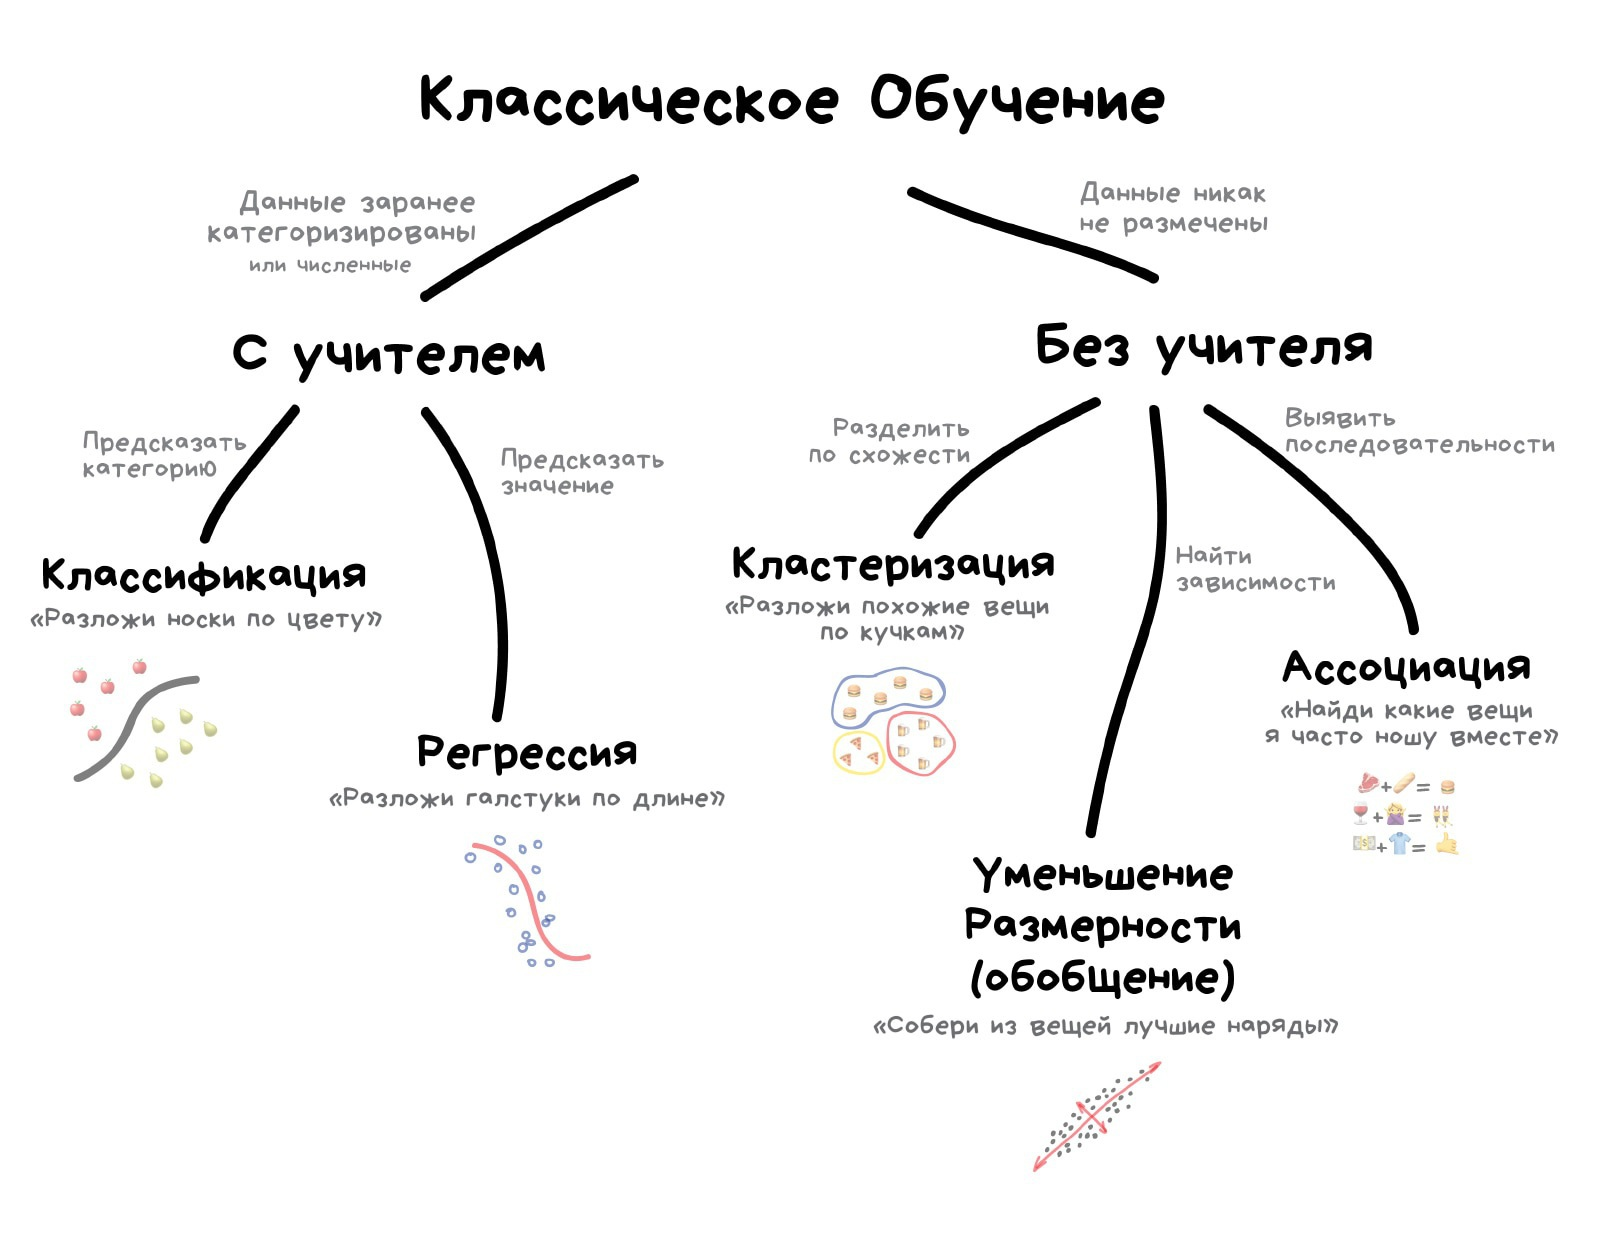

# <center>Titanic : Machine Learning from Disaster - описание задачи

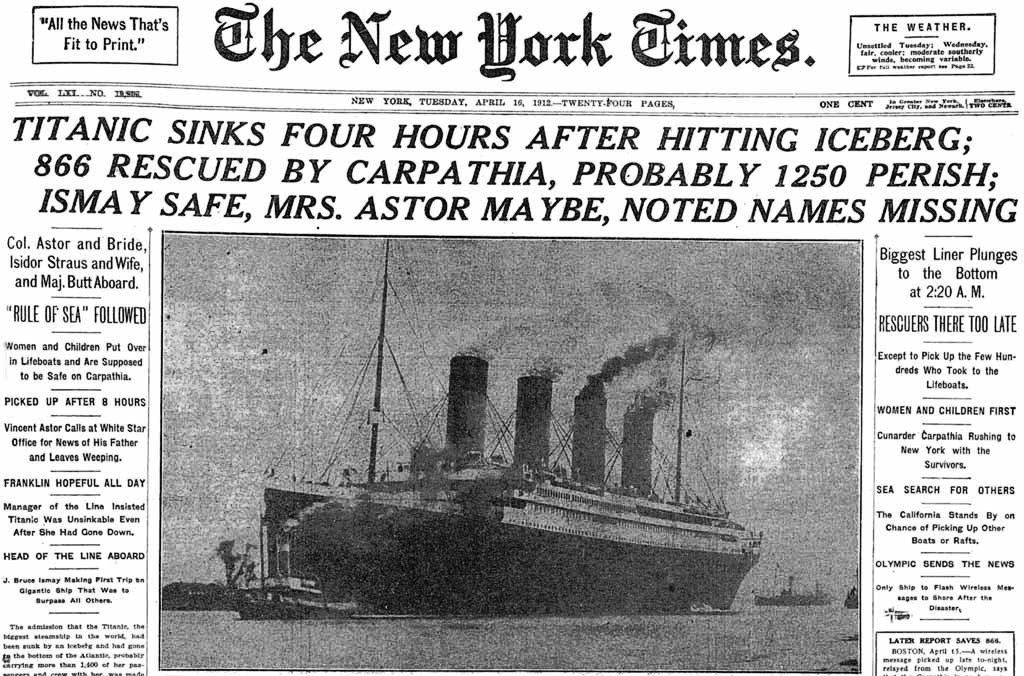

Даны две таблицы (выборки) - тренировочная и тестовая -  с данными о пассажирах Титаника в формате .csv. Каждая строка = признаковое описание одного из пассажиров. Для тестовой выборки нужно предсказать, выжил ли пассажир - целевая переменная (колонка, target) "Survived".



- **train.csv** - данные для обучения модели, содержат колонку "Survived"


- **test.csv** - данные для которых нужно сделать предсказание, колонки с ответом не содержат

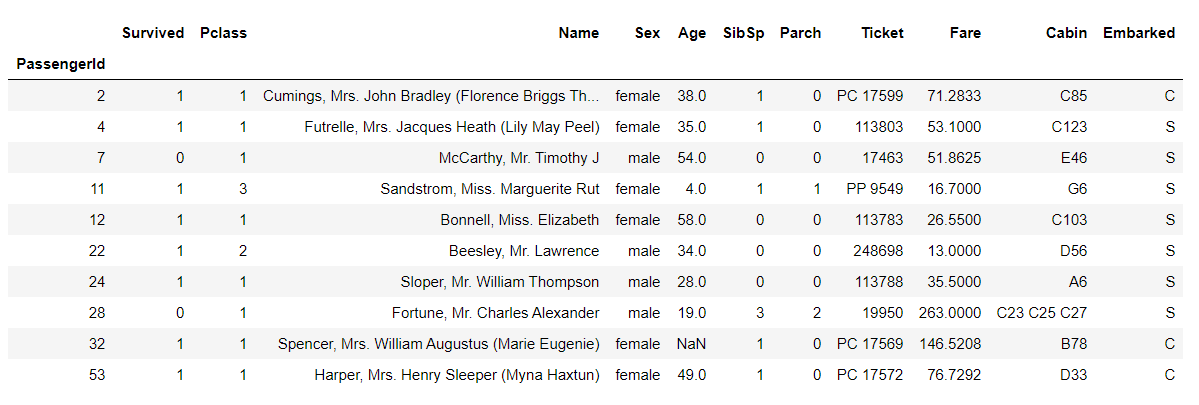


Задача является задачей бинарной классификации, так как для каждого из наблюдений (т.е. для пассажира) нам нужно предсказать, выжил он или нет (для целевой переменной "Survived" существует только два значения: 1 и 0 соответственно).


Задача является задачей обучения с учителем (supervised learning) : для тренировочной выборки у нас есть "ответы".

**Признаки (колонки, переменные, атрибуты) датасета:**


PassengerId: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).

Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.

Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.

Name: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.

Sex: Пол пассажира. Либо мужчины (=Male) оибо женщины (=Female).

Age: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.

SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.

Parch: Количество родителей детей (Number of parents of children travelling with each passenger).

Ticket: Номер билета.

Fare: Сумма, которую заплатил пассажир за путешествие.

Cabin: Номер каюты пассажира. "NaN" значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.

Embarked: Порт отправления данного пассажира.

In [1]:
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt


import seaborn as sns

In [2]:
#Путь к данным

PATH_TO_TRAIN='train.csv'
PATH_TO_TEST ='test.csv'

In [3]:
#Загрузка данных

train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId') #обучающая выборка
test = pd.read_csv(PATH_TO_TEST, index_col='PassengerId')   #тестовая выборка (для неё будем предсказывать)

In [5]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
#так можно делать подвыборки из данных

train[(train['Age'] == 14)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


In [9]:
#так можно делать подвыборки из данных

train[(train['Sex'] == 'male') & (train['Embarked'] == 'S')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [10]:
#аналогичный способ выбрать те же строчки, при помощи метода quiery

train.query("Sex == 'male' & Embarked == 'S'")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [4]:
#так можно посмотреть на информацию о колонках: типы данных, количество пропущенных значений и т.д

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
#удаление ненужных колонок

useless_columns = ['Name', 'Ticket', 'Cabin']

train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

### Заполнение пропусков в данных

In [6]:
#imputing - заполнение пропущенных данных

def impute_data(df):
    
    df_copy = df.copy() #копируем, чтобы не изменять оригинал
    
    #заполняем пропущенные значения для категориальных переменных самым частым значением в колонке
    categorial_vars = list(df_copy.select_dtypes(include=['object']).columns.values)
    for col in categorial_vars:
        
        #Цепочка действий: Берётся колонка->Потом на основе значений этой колонки формируется массив состоящий из true и false ->
        #далее (values) эти значения превращаются в обычный список -> any() проверяется есть ли в этом списке хоть одно значение true,
        #это происходит по правилу: есть ли в ячеейке какое либо значение (Есть - true, нету - false) ->
        #мода не вычисляется только тогда, когда столбец полностью пуст, в остальном же, он пустые ячейки ею заполнит.
        
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
    
    
    
    #заполняем пропущенные значения для количественных переменных медианой по столбцу
    numerical_vars = list(df_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    for col in numerical_vars:        
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace=True)

            
    return df_copy

In [7]:
train_full = impute_data(train_clean)
test_full = impute_data(test_clean)

In [8]:
#Проверим данные после заполнения

train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [17]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


### Визуализация данных

В этом подразделе будет показано, как при помощи всего лишь одного графика можно очень хорошо изучить данные

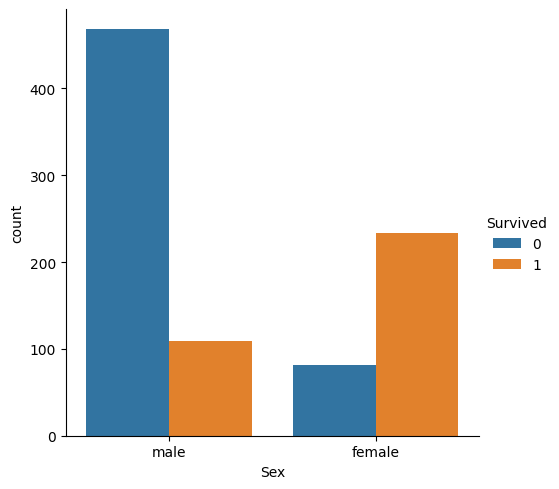

In [18]:
#мужчины умирают гораздо чаще

sns.catplot(x='Sex', data=train_full, hue='Survived', kind='count');

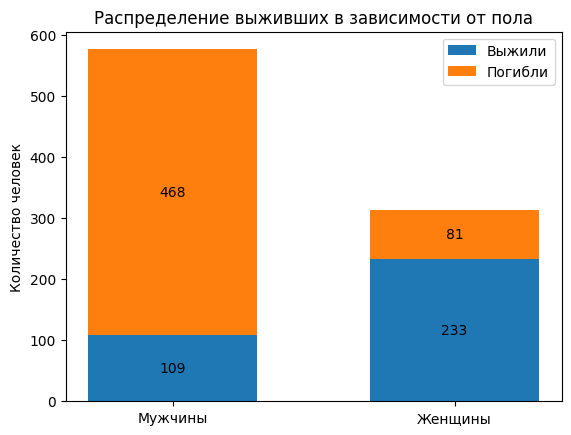

In [19]:
import numpy as np
# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(train_full.loc[(train_full['Sex'] == 'male')])
females_total = len(train_full.loc[(train_full['Sex'] == 'female')])
males_survived = len(train_full.loc[((train_full['Sex'] == 'male') & (train_full['Survived'] == 1))])
females_survived = len(train_full.loc[((train_full['Sex'] == 'female') & (train_full['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [20]:
#Посмотрим в процентном соотношении
print(f'''Выжило мужчин: {round(males_survived*100/males_total, 2)}%
Выжило женщин: {round(females_survived*100/females_total, 2)}%
''')

Выжило мужчин: 18.89%
Выжило женщин: 74.2%



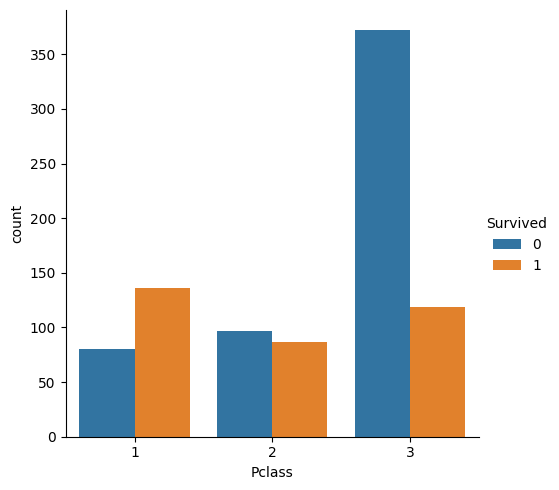

In [21]:
#бедные тоже

sns.catplot(x='Pclass', data=train_full, hue='Survived', kind='count');

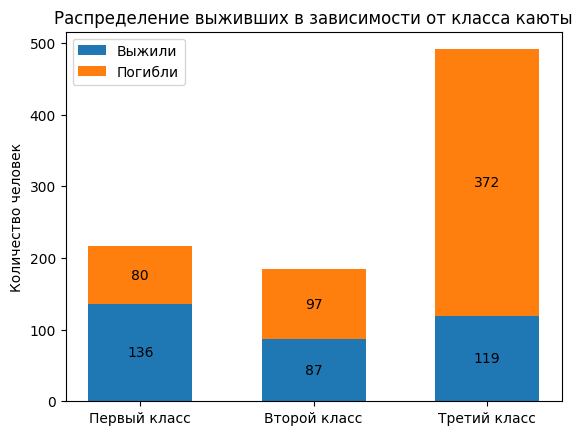

In [22]:
# Посчитаем общее количество для каждого из классов, количество выживших
first_total = len(train_full.loc[(train_full['Pclass'] == 1)])
second_total = len(train_full.loc[(train_full['Pclass'] == 2)])
third_total = len(train_full.loc[(train_full['Pclass'] == 3)])
first_survived = len(train_full.loc[((train_full['Pclass'] == 1) & (train_full['Survived'] == 1))])
second_survived = len(train_full.loc[((train_full['Pclass'] == 2) & (train_full['Survived'] == 1))])
third_survived = len(train_full.loc[((train_full['Pclass'] == 3) & (train_full['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [first_survived, second_survived, third_survived],
    'Погибли': [first_total-first_survived, second_total-second_survived, third_total-third_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('Первый класс', 'Второй класс', 'Третий класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса каюты')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [23]:
#Посмотрим в процентном соотношении
print(f'''Выжило из 1 класса: {round(first_survived*100/first_total, 2)}%
Выжило из 2 класса: {round(second_survived*100/second_total, 2)}%
Выжило из 3 класса: {round(third_survived*100/third_total, 2)}%
''')

Выжило из 1 класса: 62.96%
Выжило из 2 класса: 47.28%
Выжило из 3 класса: 24.24%



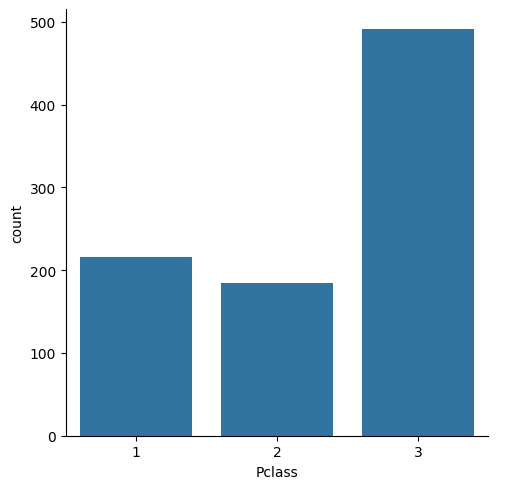

In [24]:
#При этом, бедных было больше всего

sns.catplot(x='Pclass', data=train_full, kind='count');

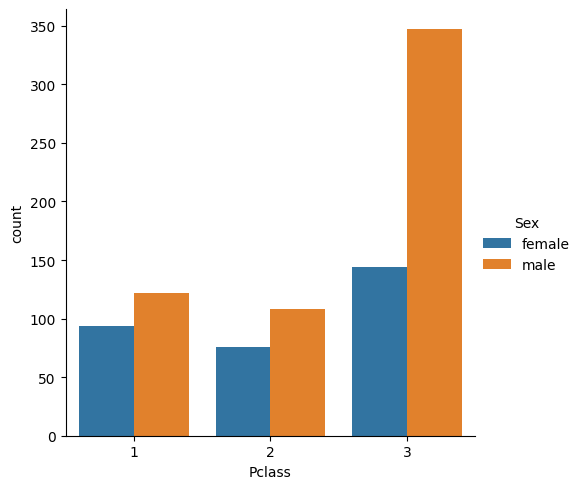

In [25]:
#Бедных мужчин было больше всего

sns.catplot(x='Pclass', data=train_full, hue='Sex', kind='count');

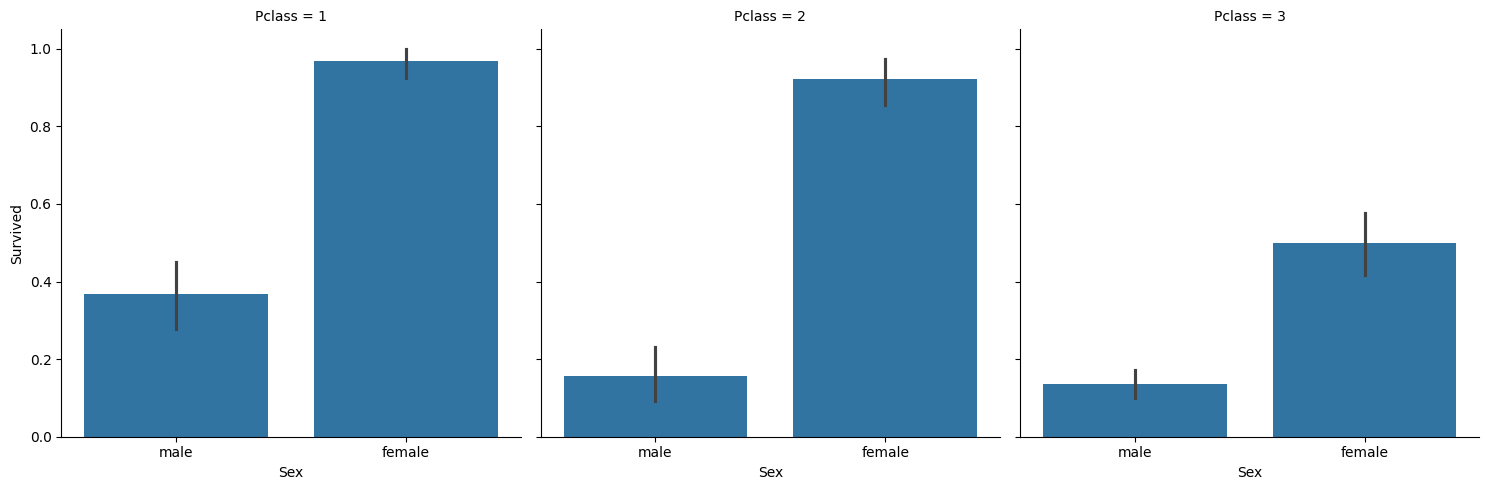

In [26]:
#И выживших среди них меньше всего

sns.catplot(x="Sex", y="Survived", col="Pclass", data=train_full, kind="bar");

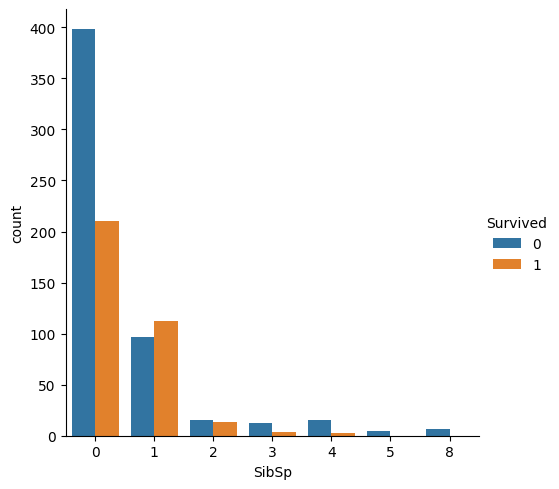

In [27]:
#от количества членов семьи также зависит выживаемость
#здесь это количество супругов + родственников пассажира (признак SibSp)

sns.catplot(x='SibSp', data=train_full, hue='Survived', kind='count');

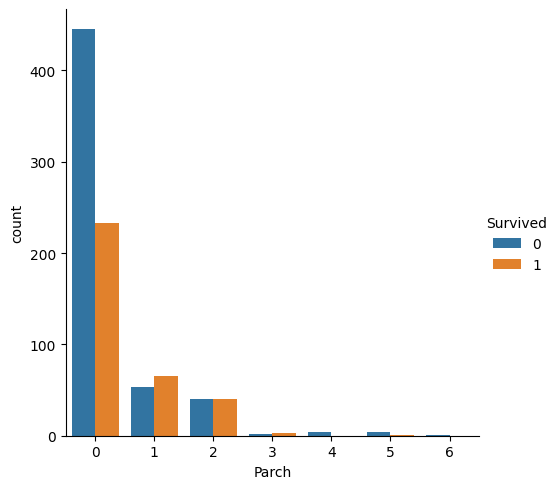

In [28]:
#от количества членов семьи также зависит выживаемость
#здесь это количество детей + родителей пассажира (признак Parch)

sns.catplot(x='Parch', data=train_full, hue='Survived', kind='count');

### Feature Engineering

Мы заметили, что количество детей и родственников влияет на выживаемость. Объединим это в новый признак *Family_size*

In [29]:
#создать новую колонку-признак в DataFrame очень просто:

train_full['Family_size'] = train_full['Parch'] + train_full['SibSp']
test_full['Family_size'] = test_full['Parch'] + test_full['SibSp']

train_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0


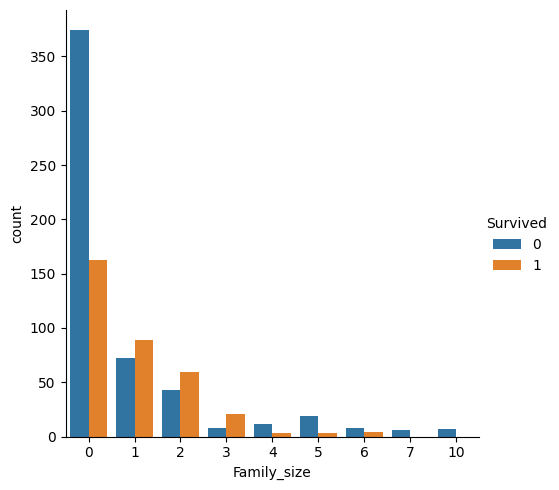

In [30]:
#Новый признак помогает лучше отделить случаи, в которых люди выживали

sns.catplot(x='Family_size', data=train_full, hue='Survived', kind='count');

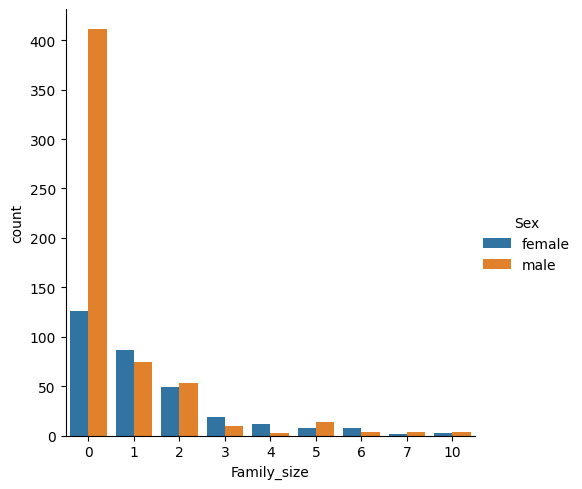

In [31]:
#признак, в большей степени, касается женщин

sns.catplot(x='Family_size', data=train_full, hue='Sex', kind='count');

### Сохранение данных 

In [32]:
#сохраним данные в файл, чтобы не потерять изменения

train_full.to_csv('train_imputed.csv')
test_full.to_csv('test_imputed.csv')

### Пример очень простой baseline-модели (решающий пень, decision stump)

In [33]:
#таким образом можно получить булев вектор, содержащий условие

(test_full['Sex'] == 'male')

PassengerId
892      True
893     False
894      True
895      True
896     False
        ...  
1305     True
1306    False
1307     True
1308     True
1309     True
Name: Sex, Length: 418, dtype: bool

In [34]:
(test_full['Sex'] == 'male') & (test_full['Pclass'] == 3)

PassengerId
892      True
893     False
894     False
895      True
896     False
        ...  
1305     True
1306    False
1307     True
1308     True
1309     True
Length: 418, dtype: bool

In [35]:
#Выбираем всех мужчин, которые были в 3-ем (бедном) классе и говорим, что они не выжили


simple_pred = (((test_full['Sex'] == 'male') & (test_full['Pclass'] == 3))).astype(int).values
simple_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [44]:
simple_pred2 = (((train_full['Sex'] == 'male') & (train_full['Pclass'] == 3))).astype(int).values
simple_pred2
from sklearn.metrics import accuracy_score
accuracy_score(train_full['Survived'], simple_pred2)

0.33221099887766553

In [48]:
simple_pred2 = (((train_full['Sex'] == 'male') & (train_full['Pclass'] == 3) & (train_full['SibSp'] > 0))).astype(int).values
simple_pred2
accuracy_score(train_full['Survived'], simple_pred2)

0.5566778900112234

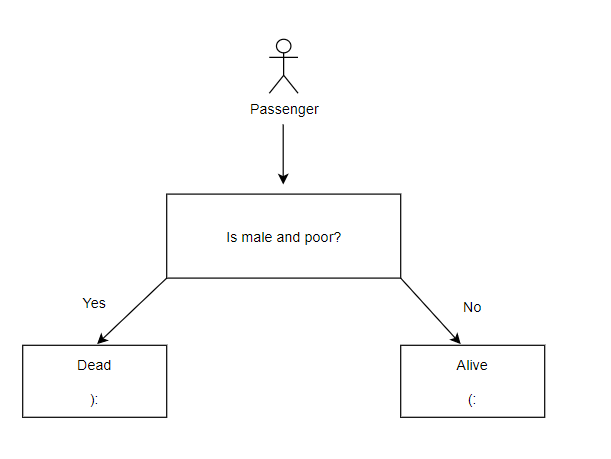

### Оформление результата

In [49]:
#функция для составления submission-файла соревнования

def make_prediction_file(prediction, test_data, name):
    
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], "Survived": prediction})  
    result.to_csv(name, index=False)

In [50]:
make_prediction_file(simple_pred, test, 'titanic_simple_baseline.csv')

### Примеры машинного обучения

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.preprocessing import StandardScaler



In [51]:
# Подготовка данных
data = pd.get_dummies(train_full)
data_t = pd.get_dummies(test_full)
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Логистическая регрессия
logreg = LogisticRegression(max_iter=1000)
#logreg.fit(X_train, y_train)
logreg.fit(X, y)
# y_pred_logreg = logreg.predict(X_test)
y_pred_logreg = logreg.predict(data_t)
#print(f'Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_logreg)}')
print(f'Survived (Logistic Regression): {data_t[y_pred_logreg.astype(bool)]}')
print('acc for training data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(logreg.score(X_test, y_test)))


# Случайный лес
rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train, y_train)
rf.fit(X, y)
# y_pred_rf = rf.predict(X_test)
y_pred_rf = rf.predict(data_t)
#print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf)}')
print(f'Survived (Random Forest): {data_t[y_pred_rf.astype(bool)]}')

Survived (Logistic Regression):              Pclass   Age  SibSp  Parch      Fare  Family_size  Sex_female  \
PassengerId                                                                  
896               3  22.0      1      1   12.2875            2        True   
898               3  30.0      0      0    7.6292            0        True   
900               3  18.0      0      0    7.2292            0        True   
904               1  23.0      1      0   82.2667            1        True   
906               1  47.0      1      0   61.1750            1        True   
...             ...   ...    ...    ...       ...          ...         ...   
1301              3   3.0      1      1   13.7750            2        True   
1302              3  27.0      0      0    7.7500            0        True   
1303              1  37.0      1      0   90.0000            1        True   
1304              3  28.0      0      0    7.7750            0        True   
1306              1  39.0      0

In [42]:
#нейронная сеть
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train,y_train)
print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.829
acc for test data: 0.799


In [43]:
train_full

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,0
888,1,1,female,19.0,0,0,30.0000,S,0
889,0,3,female,28.0,1,2,23.4500,S,3


# Задачи для самостоятельного разбора

1. Используйте датасет train_full.

   Узнайте возраст самого молодого и самого старого пассажира.

   Посчитайте средний возраст путешественников.

   Постойте график зависимости возрастов пассажиров и показателей того кто выжил, а кто нет.
   HINT: используйте масштаб plt.figure(figsize=(10, 6))
   sns.histplot(data=имя_датасета, x='Имя_столбца', hue='Имя_столбца', multiple='stack', bins=30)

   Из графика убедитесь, что большая часть детей в возрасте до 10 лет выжила. В любой другой возрастной группе число жертв было выше, чем число выживших. Более 140 человек в возрастной группе 20-30 лет погибли в сравнении с примерно 80 выжившими того же возраста.

In [11]:
youngest = train_full['Age'].min()
oldest = train_full['Age'].max()
print(f"Самый молодой: {youngest}")
print(f"Самый старый: {oldest}")

Самый молодой: 0.42
Самый старый: 80.0


In [12]:
average_age = train_full['Age'].mean()
print("Средний возраст:", round(average_age, 2))

Средний возраст: 29.36


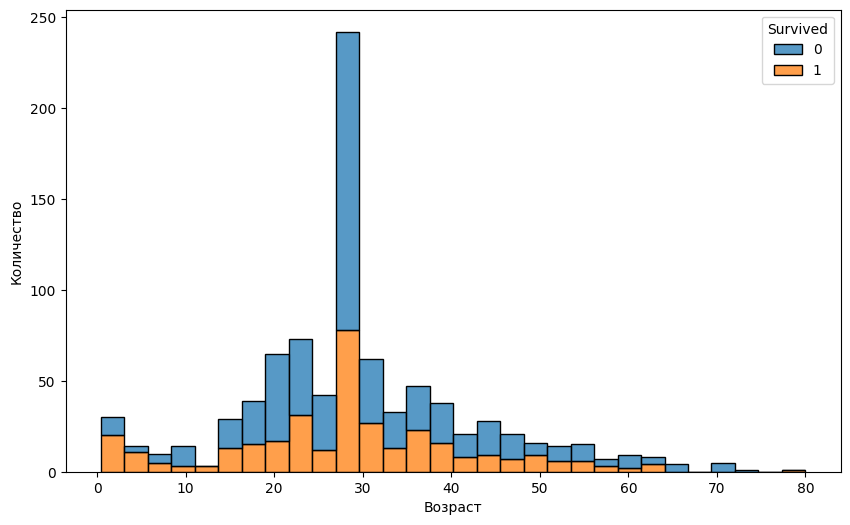

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=train_full, x='Age', hue='Survived', multiple='stack', bins=30)
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()

2. Разделив сумму тарифа (столбец Fire) на четыре категории, стало очевидно, что существует тесная связь между стоимостью тарифа и выживанием. Чем больше заплатит пассажир, тем выше будут его шансы на выживание.

  Разделите Fire на 4 категории и из получившихся значенией создайте новый столбец

  Датасет['Fare_Category'] = pd.qcut(Датасет['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

  Посторойте график зависимости категории стоимости билета и выживаемости. Для этого используйте sns.barplot(x='Столбец_1', y='Столбец_2', data=Датасет)

Убедитесь в том, что чем больше заплатит пассажир, тем выше будут его шансы на выживание.



In [15]:
train_full['Fare_Category'] = pd.qcut(train_full['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
train_full[['Fare', 'Fare_Category']].head()

,Fare,Fare_Category
PassengerId,,
1,7.2500,Low
2,71.2833,Very High
3,7.9250,Medium
4,53.1000,Very High
5,8.0500,Medium


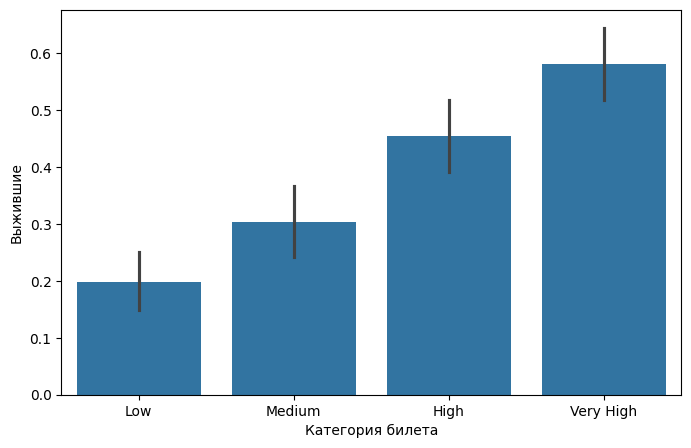

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='Fare_Category', y='Survived', data=train_full)
plt.xlabel("Категория билета")
plt.ylabel("Выжившие")
plt.show()


3. Столбец Embarked хранит информацию о порте посадки пассажира.

Есть три возможных значения для Embarked -  Саутгемптон (S), Шербург (C) и Куинстаун (Q). 

Посчитайте в процентах сколько пассажиров отправилось в путешествие в каждом из портов. 

Посторойте график, чтобы убедиться, что люди, которые сели в порте Шербург, имели более высокие шансы на выживание, чем люди, которые сели в портах Саутгемптон или Квинстаун.

Более 70% людей сели в Саутгемптон. Чуть менее 20% сели на борт из Шербура, а остальные — из Квинстауна. 



In [17]:
total = len(train_full)

southampton = len(train_full[train_full['Embarked'] == 'S'])
cherbourg = len(train_full[train_full['Embarked'] == 'C'])
queenstown = len(train_full[train_full['Embarked'] == 'Q'])

print(f'''Из Саутгемптона: {round(southampton * 100 / total, 2)}%
Из Шербура: {round(cherbourg * 100 / total, 2)}%
Из Куинстауна: {round(queenstown * 100 / total, 2)}%
''')

Из Саутгемптона: 72.5%
Из Шербура: 18.86%
Из Куинстауна: 8.64%



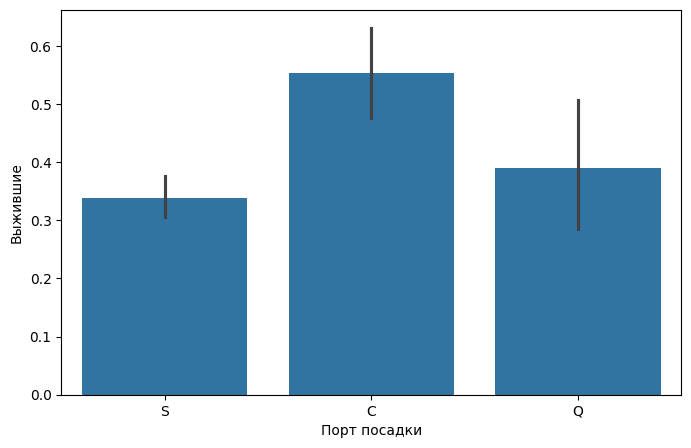

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=train_full)
plt.xlabel("Порт посадки")
plt.ylabel("Выжившие")
plt.show()